In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("python-ml-course-master/datasets/ads/Advertising.csv")

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 4)

In [5]:
df["corrn_tv"] = (df["TV"] - np.mean(df["TV"])) * (df["Sales"] - np.mean(df["Sales"]))

In [6]:
df["corrn_tv_1"] = (df["TV"] - np.mean(df["TV"])) ** 2

In [7]:
df["corrn_tv_2"] = (df["Sales"] - np.mean(df["Sales"])) ** 2

In [8]:
df.head()

,TV,Radio,Newspaper,Sales,corrn_tv,corrn_tv_1,corrn_tv_2
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006


In [9]:
corr_pearson = sum(df["corrn_tv"]) / np.sqrt(sum(df["corrn_tv_1"]) * sum(df["corrn_tv_2"]))

In [10]:
corr_pearson

0.782224424861606

In [11]:
df.corr()

,TV,Radio,Newspaper,Sales,corrn_tv,corrn_tv_1,corrn_tv_2
TV,1.000000,0.054809,0.056648,0.782224,-0.129791,-0.078797,0.075915
Radio,0.054809,1.000000,0.354104,0.576223,0.333135,0.096884,0.402556
Newspaper,0.056648,0.354104,1.000000,0.228299,0.124422,0.081003,0.142256
Sales,0.782224,0.576223,0.228299,1.000000,0.096153,-0.146003,0.322686
corrn_tv,-0.129791,0.333135,0.124422,0.096153,1.000000,0.744287,0.894818
corrn_tv_1,-0.078797,0.096884,0.081003,-0.146003,0.744287,1.000000,0.536240
corrn_tv_2,0.075915,0.402556,0.142256,0.322686,0.894818,0.536240,1.000000


In [12]:
def corr_coeff(ldf, var1, var2):
    ldf["corrn"] = (ldf[var1] - np.mean(ldf[var1])) * (ldf[var2] - np.mean(ldf[var2]))
    ldf["corrn_1"] = (ldf[var1] - np.mean(ldf[var1])) ** 2
    ldf["corrn_2"] = (ldf[var2] - np.mean(ldf[var2])) ** 2
    corr_pearson = sum(ldf["corrn"]) / np.sqrt(sum(ldf["corrn_1"]) * sum(ldf["corrn_2"]))
    return corr_pearson

In [13]:
corr_coeff(df,"TV","Sales")

0.782224424861606

In [14]:
corr_coeff(df,"Radio","Sales")

0.5762225745710553

In [15]:
corr_coeff(df,"Newspaper","Sales")

0.22829902637616525

In [16]:
df = pd.read_csv("python-ml-course-master/datasets/ads/Advertising.csv")

In [17]:
cols = df.columns.values

In [18]:
for x in cols:
    for y in cols:
        print(x + ", " + y + " : " + str(corr_coeff(df,x,y)))

TV, TV : 1.0
TV, Radio : 0.05480866446583009
TV, Newspaper : 0.056647874965056993
TV, Sales : 0.782224424861606
Radio, TV : 0.05480866446583009
Radio, Radio : 1.0
Radio, Newspaper : 0.3541037507611752
Radio, Sales : 0.5762225745710553
Newspaper, TV : 0.056647874965056993
Newspaper, Radio : 0.3541037507611752
Newspaper, Newspaper : 1.0
Newspaper, Sales : 0.22829902637616525
Sales, TV : 0.782224424861606
Sales, Radio : 0.5762225745710553
Sales, Newspaper : 0.22829902637616525
Sales, Sales : 1.0


Text(0.5,1,'Gastos en TV vs Ventas')

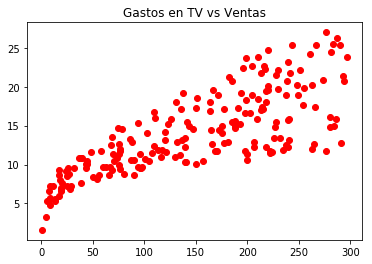

In [19]:
plt.plot(df["TV"], df["Sales"],"ro")
plt.title("Gastos en TV vs Ventas")

Text(0.5,1,'Gastos en Radio vs Ventas')

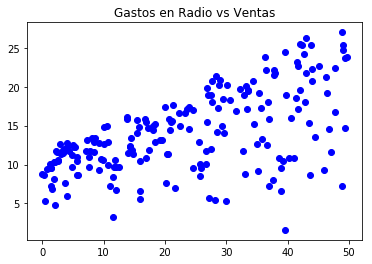

In [20]:
plt.plot(df["Radio"], df["Sales"],"bo")
plt.title("Gastos en Radio vs Ventas")

Text(0.5,1,'Gastos en diario vs Ventas')

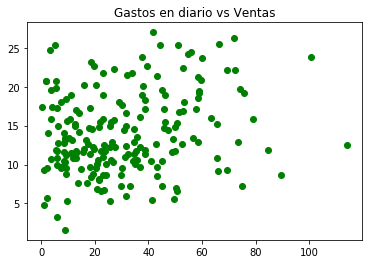

In [21]:
plt.plot(df["Newspaper"], df["Sales"],"go")
plt.title("Gastos en diario vs Ventas")

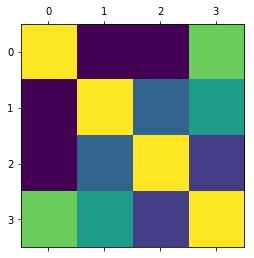

In [23]:
df = pd.read_csv("python-ml-course-master/datasets/ads/Advertising.csv")
plt.matshow(df.corr())

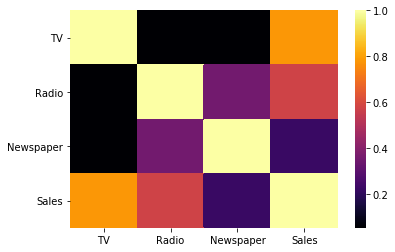

In [29]:
sns.heatmap(df.corr(),cmap="inferno")